# Bad Betas

Tasks: 

- try changing `method="RK45"` using `solve_ivp`

- system might be stiff and Runge Kutta might fail


Notes:


> Explicit Runge-Kutta methods (‘RK23’, ‘RK45’, ‘DOP853’) should be used for non-stiff problems and implicit methods (‘Radau’, ‘BDF’) for stiff problems

i.e. for unstable problems unless the step size is taken to be extremely small:

- Implicit Runge-Kutta method might be good

- BDF (Backward Differentiation Formula) implicit multi-step method should be good

- LSODA uses adaptive Adams methods for non-stiff parts and BDF methods for stiff parts, automatically switching between them


In [7]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp
import pickle

import sys
sys.path.append('../tests/')
from test_solving_KEs_complete import *

In [47]:
methods = [
    "RK45",
    "BDF",
    "Radau",
    "LSODA"
]

In [43]:
bad_indices = [
    (7, 8),
    (7, 9),
    (8, 6),
    (8, 7),
    (8, 8),
    (8, 9),
    (9, 4),
    (9, 5),
    (9, 6),
    (9, 7),
    (9, 8),
    (9, 9)]

In [44]:
"""Complete case test."""
# setup
# TODO: increase these values
N = 100
I0 = 10 
time_max = 20

beta1 = 2 / N       # pairwise infection rate
beta2 = 4 / (N**2)  # hyperedge contagion rate
mu    = 1           # recovery rate

print(f"Setup: \n")
print(f"\tH = Complete Hypergraph, N = {N}, I0 = {I0}\n")
print(f"\tbeta1 = {beta1}, beta2 = {beta2}, mu = {mu}\n")

Setup: 

	H = Complete Hypergraph, N = 100, I0 = 10

	beta1 = 0.02, beta2 = 0.0004, mu = 1



In [45]:
i_max = 10
j_max = 10

k_star = np.zeros((i_max, j_max)) # to store the values k^* = E[X(t_max)]

eps = 1e-1 # shift for esp to not start with 0 !

beta1_vec = (np.array(list(range(i_max))) + eps) / N
beta2_vec = (np.array(list(range(j_max))) + eps) / (N**2)

print(f"beta2: {beta1_vec[:5]}, ..., {beta1_vec[-3:-1]}")
print(f"beta2: {beta2_vec[:5]}, ..., {beta1_vec[-3:-1]}")

beta2: [0.001 0.011 0.021 0.031 0.041], ..., [0.071 0.081]
beta2: [1.0e-05 1.1e-04 2.1e-04 3.1e-04 4.1e-04], ..., [0.071 0.081]


In [46]:
M = N + 1 # number of all states

# set the initial condition
p0 = np.zeros(M)
p0[I0] = 1.0 # all other states have prob 0 at time 0
print(f"p0 = {p0[:20]} ...")

# time range and times to evaluate solution
nsteps = 101
t_span = (0.0, time_max)
t_eval = np.linspace(t_span[0], t_span[1], nsteps)

p0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...


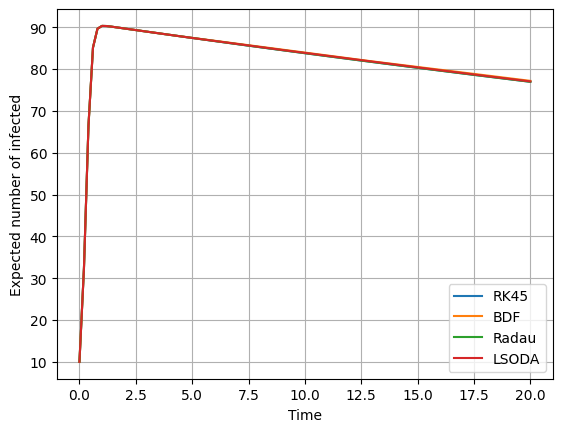

In [51]:
# testing each method on single bad beta1, beta2 pair
bad_i, bad_j = bad_indices[2]
beta1 = beta1_vec[bad_i]
beta2 = beta2_vec[bad_j]

# prepare ode system first
ode_system_complete = list_all_ODEs_complete(N, beta1, beta2, mu)

def f_ode(t, p):
    return ode_system_complete(t, p)

plt.figure()
for method in methods:

    sol = solve_ivp(f_ode, 
                    t_span, 
                    p0, 
                    t_eval=t_eval,
                    method=method
    )
    expected_values = calculate_expected_values(sol)
    plt.plot(sol.t, expected_values, label=method)

plt.xlabel("Time")
plt.ylabel("Expected number of infected")
plt.grid(True)
plt.legend()
plt.savefig("../figures/solutions-kolmogorov/complete/bad-beta-pair-methods.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()